In [ ]:
!pip install gymnasium

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
env = gym.make("FrozenLake-v1", is_slippery=True)
print("State space:", env.observation_space.n)
print("Action space:", env.action_space.n)

State space: 16
Action space: 4


In [ ]:

Q = np.zeros((env.observation_space.n, env.action_space.n))
Q


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
alpha = 0.8
gamma = 0.95
epsilon = 0.1
episodes = 10000
max_steps = 100


In [ ]:
rewards_all_episodes = []

for episode in range(episodes):
    state, _ = env.reset()
    done = False
    total_rewards = 0

    for step in range(max_steps):

        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state,:])


        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        state = new_state
        total_rewards += reward

        if done:
            break

    rewards_all_episodes.append(total_rewards)

print("Training finished.\n")

Training finished.



In [ ]:
test_episodes = 100
successes = 0
for episode in range(test_episodes):
    state = env.reset()[0]
    done = False
    while not done:
        action = np.argmax(Q[state,:])
        state, reward, done, truncated, info = env.step(action)
        if done and reward == 1:
            successes += 1

print(f"Success rate over {test_episodes} episodes: {successes}%")


Success rate over 100 episodes: 84%


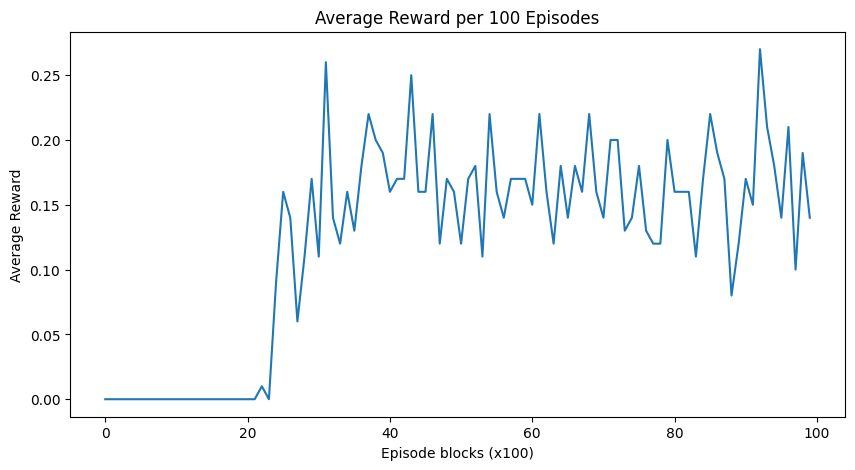

In [ ]:

rewards_per_hundred = np.split(np.array(rewards_all_episodes), episodes/100)
avg_rewards = [np.mean(r) for r in rewards_per_hundred]

plt.figure(figsize=(10,5))
plt.plot(avg_rewards)
plt.title("Average Reward per 100 Episodes")
plt.xlabel("Episode blocks (x100)")
plt.ylabel("Average Reward")
plt.show()


Key Questions / Analysis / Interpretation to be Evaluated

1. How does the Q-Learning algorithm update the Q-values?
- Q-Learning updates its knowledge about the environment step by step. Every time the agent takes an action in a certain state, it observes the result (new state and reward) and adjusts its estimate of how good that action is. Over many episodes, it learns which actions are best in each state by combining what it already knew with what it just experienced.




2. What is the role of the learning rate (alpha) and how does it affect
the learning process?
- Role of learning rate (alpha, α)
  - α controls how much new information overrides old information.
  - α=1 → completely replaces old Q-value with new info.
  - α=0 → ignores new info; Q-values never update.
- Effect:
  - High α → fast learning but can be unstable.
  - Low α → slow learning, more stable.

3. How does the discount factor (gamma) influence the Q-Learning
algorithm?
- γ controls importance of future rewards.
γ=0 → agent only considers immediate rewards.
- γ≈1 → agent cares about long-term rewards.
- Effect:
   - Higher γ → agent plans ahead to maximize cumulative reward.
   - Lower γ → agent may take suboptimal shortcuts.

4. What is the epsilon-greedy policy and why is it used in Q-
Learning?
- Epsilon-greedy is a strategy to balance exploration vs exploitation:
   - With probability ε, choose a random action (exploration).
   - With probability 1-ε, choose the best known action (exploitation).
- Why:
   - Prevents the agent from getting stuck in a suboptimal path early.
   - Helps discover better actions that give higher rewards in the long term.

5. How does the exploration rate (epsilon) impact the agent’s
learning and performance?
- High ε → agent explores more → learns about the environment thoroughly → may converge slower.
- Low ε → agent exploits too early → may miss better paths → may converge quickly but suboptimally.

6. What challenges did you encounter while implementing the Q-
Learning algorithm and how did you address them?
-  Slippery environment → stochastic transitions (action may not go as intended).
   - Solution: Run many episodes to average out randomness.
- Choosing hyperparameters → α, γ, ε affect learning drastically.
   - Solution: Experiment with multiple values and observe average rewards.
- Sparse rewards → reward only at goal → learning can be slow.
   - Solution: Increase episodes and steps per episode.


7. How does the performance of the Q-Learning agent change with
different values of alpha, gamma, and epsilon?
- α (learning rate): higher → faster Q-table updates, may overshoot; lower → slower convergence.
- γ (discount factor): higher → agent plans better for long-term reward; lower → shortsighted decisions.
- ε (exploration rate): higher → better exploration, slower convergence; lower → quicker convergence, may be suboptimal.

8. Can the Q-Learning algorithm be applied to other environments?
If yes, what changes would be required in the implementation?
- Yes, Q-Learning works for any discrete state-action environment.
- Changes needed:
   - Define new state_space and action_space sizes.
   - Adjust reward structure if different.
   - Tune hyperparameters (α, γ, ε) based on environment complexity.

9. Discuss the importance of choosing the right hyper parameters for
the Q-Learning algorithm.
- Right α, γ, ε → stable convergence, high cumulative reward.
- Wrong values → slow learning, unstable Q-values, or suboptimal policies.
- Often requires experimentation or grid search.

10. How does the Q-Learning algorithm compare to other reinforcement learning algorithms?

- Q-Learning is a simple and effective algorithm for environments with discrete states and actions.
It learns the best action for each state based on rewards it receives, without needing a model of the environment.

- Compared to other RL algorithms:
    - SARSA is similar but learns the policy that it actually follows (on-policy), while Q-Learning is off-policy.
    - Deep Q-Networks (DQN) can handle large or continuous state spaces using neural networks.
    - Policy Gradient methods learn a policy directly instead of using a Q-table and are better for stochastic or complex environments.

- Overall, Q-Learning is easier to implement and understand, but for bigger or continuous problems, advanced methods like DQN are preferred.


11. The Q-table stores the expected reward for each action in every state.
By looking at the Q-values, we can see which actions the agent prefers:

- Higher Q-values mean that the agent expects a higher cumulative reward by taking that action.
- In each state, the action with the highest Q-value is the agent's preferred move.
- This helps us understand how the agent plans its path to reach the goal and avoid holes in the Frozen Lake environment.

- For example, if the Q-value for 'Right' is highest in a state, the agent will usually move Right from that state.


In [5]:
# Install gym if not already installed
import sys
!{sys.executable} -m pip install gym


import numpy as np
import gym
import random


[notice] A new release of pip is available: 23.3.2 -> 25.2
[notice] To update, run: C:\Users\Hp\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [ ]:
env = gym.make("FrozenLake-v1", is_slippery=True)  # slippery=True makes it stochastic
state_space = env.observation_space.n
action_space = env.action_space.n

print("State space:", state_space)
print("Action space:", action_space)


In [ ]:
# Initialize Q-table
Q = np.zeros((state_space, action_space))

# Hyperparameters
alpha = 0.8       # learning rate
gamma = 0.95      # discount factor
epsilon = 0.1     # exploration rate
episodes = 2000
max_steps = 100   # per episode

In [ ]:
rewards = []

for episode in range(episodes):
    state = env.reset()[0]  # reset returns (observation, info)
    total_rewards = 0

    for step in range(max_steps):
        # Exploration vs Exploitation
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state,:])

        # Take action
        next_state, reward, done, truncated, info = env.step(action)

        # Update Q-value
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state,:]) - Q[state, action])

        state = next_state
        total_rewards += reward

        if done:
            break

    rewards.append(total_rewards)

print("Training finished.\n")


In [ ]:
episodes_test = 5

for episode in range(episodes_test):
    state = env.reset()[0]
    env.render()
    done = False
    total_reward = 0

    while not done:
        action = np.argmax(Q[state,:])
        state, reward, done, truncated, info = env.step(action)
        total_reward += reward
        env.render()

    print(f"Episode {episode+1}: Total Reward = {total_reward}\n")


In [ ]:
import matplotlib.pyplot as plt

plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Q-Learning Performance on Frozen Lake")
plt.show()